# TP 2.3 -  Profit et perte de la couverture Black-Scholes

## Question 1

Pour dériver la formule explicite du processus $ \sigma_t $, partons de l'équation différentielle stochastique :

$$
d\sigma_t = -\lambda (\sigma_t - c) \, dt + \gamma \, dW_t,
$$

Puis, définissons un nouveau processus $ Y_t $ par

$$
Y_t = e^{\lambda t} \sigma_t.
$$

En appliquant la formule d'Itô à $ Y_t $, nous obtenons :

$$
dY_t = \frac{\partial Y_t}{\partial t} \, dt + \frac{\partial Y_t}{\partial \sigma_t} \, d\sigma_t + \frac{1}{2} \frac{\partial^2 Y_t}{\partial \sigma_t^2} \, (d\sigma_t)^2.
$$

Comme $ Y_t = e^{\lambda t} \sigma_t $, nous avons :
- $ \frac{\partial Y_t}{\partial t} = \lambda e^{\lambda t} \sigma_t $,
- $ \frac{\partial Y_t}{\partial \sigma_t} = e^{\lambda t} $,
- $ \frac{\partial^2 Y_t}{\partial \sigma_t^2} = 0 $

En substituant ces expressions dans la formule d'Itô, nous obtenons :

$$
dY_t = \lambda e^{\lambda t} \sigma_t \, dt + e^{\lambda t} \, d\sigma_t.
$$

Maintenant, remplaçons $ d\sigma_t $ par son expression dans l'équation différentielle stochastique initiale :

$$
dY_t = \lambda e^{\lambda t} \sigma_t \, dt + e^{\lambda t} \left(-\lambda (\sigma_t - c) \, dt + \gamma \, dW_t \right).
$$

En développant cette expression, nous obtenons :

$$
dY_t = \lambda e^{\lambda t} \sigma_t \, dt - \lambda e^{\lambda t} \sigma_t \, dt + \lambda c e^{\lambda t} \, dt + \gamma e^{\lambda t} \, dW_t.
$$

On remarque que les deux premiers termes s'annulent, ce qui nous laisse :

$$
dY_t = \lambda c e^{\lambda t} \, dt + \gamma e^{\lambda t} \, dW_t.
$$

Intégrons maintenant des deux côtés de $ 0 $ à $ t $ :

$$
Y_t = Y_0 + \int_0^t \lambda c e^{\lambda s} \, ds + \int_0^t \gamma e^{\lambda s} \, dW_s.
$$

Comme $ Y_t = e^{\lambda t} \sigma_t $ et $ Y_0 = \sigma_0 $, nous avons :

$$
\sigma_t e^{\lambda t} = \sigma_0 + \int_0^t \lambda c e^{\lambda s} \, ds + \int_0^t \gamma e^{\lambda s} \, dW_s.
$$

Calculons l'intégrale déterministe :

$$
\int_0^t \lambda c e^{\lambda s} \, ds = c \left( e^{\lambda t} - 1 \right).
$$

Remplaçons cela dans l'expression pour $ \sigma_t e^{\lambda t} $ :

$$
\sigma_t e^{\lambda t} = \sigma_0 + c \left( e^{\lambda t} - 1 \right) + \int_0^t \gamma e^{\lambda s} \, dW_s.
$$

Enfin, en divisant par $ e^{\lambda t} $, on isole $ \sigma_t $ :

$$
\sigma_t = c + (\sigma_0 - c) e^{-\lambda t} + \gamma \int_0^t e^{-\lambda (t - s)} \, dW_s.
$$

---

### Simulation de $ \sigma_t $ et du Mouvement Brownien

Pour simuler $ \sigma_t $, nous divisons l'intervalle de temps $ [0, T] $ en une partition régulière $ t_{i+1} - t_i = \Delta T = \frac{T}{n} $, de sorte à ce que nous ayons :

$$
\sigma_{t_{i+1}} = c + (\sigma_0 - c) e^{-\lambda t_{i+1}} + \gamma \sum_{j=0}^i e^{-\lambda (t_{i+1} - t_j)} \Delta W_j,
$$

où $ \Delta W_j = \sqrt{\Delta t} \, Z_j $ et $ Z_j \sim \mathcal{N}(0, 1) $ sont des variables normales standard indépendantes, où chaque $ \Delta W_j $ représente l'incrément du mouvement brownien sur l'intervalle de temps $ [t_j, t_{j+1}] $.



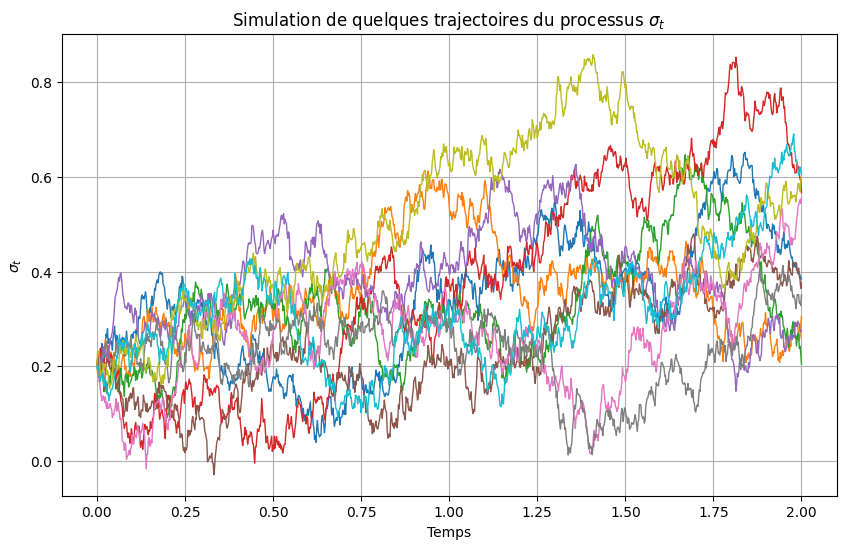

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# Paramètres de la simulation
T = 2.0           # Temps total
n = 1000           # Nombre de pas de temps
dt = T / n        # Taille d'un pas de temps
m = 1000          # Nombre de trajectoires à simuler

# Paramètres du processus OU
sigma0 = 0.2      # Valeur initiale de sigma
lambda_ = 2.0     # Taux de retour à la moyenne
c = 0.4           # Niveau moyen à long terme
gamma = 0.3       # Volatilité du processus

t = np.linspace(0, T, n + 1)

sigma = np.zeros((m, n + 1))
sigma[:, 0] = sigma0

for i in range(1, n + 1):
    dW = np.sqrt(dt) * np.random.randn(m)
    sigma[:, i] = sigma[:, i - 1] + lambda_ * (c - sigma[:, i - 1]) * dt + gamma * dW

plt.figure(figsize=(10, 6))
for j in range(10):  # Afficher les 10 premières trajectoires
    plt.plot(t, sigma[j], lw=1)
plt.title('Simulation de quelques trajectoires du processus $\\sigma_t$')
plt.xlabel('Temps')
plt.ylabel('$\\sigma_t$')
plt.grid(True)
plt.show()


Les trajectoires simulées du processus OU $ \sigma_t $ montrent une tendance générale de retour vers la moyenne $ c = 0.4 $.

Les trajectoires fluctuent autour de cette valeur, avec des variations dues à la composante de volatilité $ \gamma $, produisant des oscillations aléatoires.

Bien que chaque trajectoire soit unique, elles restent globalement confinées dans une bande autour de la moyenne, ce qui reflète l'effet stabilisateur du paramètre $ \lambda $. De plus, on observe que $ \sigma_t $ n'est pas limité par une barrière fixe : certaines trajectoires peuvent approcher zéro ou dépasser 0.8, mais la majorité des trajectoires oscille autour de la valeur moyenne.


## Question 2
Pour simuler le processus $ S_t $, nous partons de la formule donnée dans l'énoncé pour le prix d'un actif risqué sous forme exponentielle :

$$
S_t := S_0 \exp \left( -\frac{1}{2} \int_0^t \sigma_u^2 \, du + \int_0^t \sigma_u \, dW_u^1 \right),
$$

où $ S_0 $ est le prix initial, et $ \sigma_t $ est un processus stochastique décrit par une équation différentielle qui suit un processus d'Ornstein-Uhlenbeck.

Pour simuler ce processus, nous utilisons une version discrète en remplaçant les intégrales par des sommes discrètes. La formule discrétisée pour $ S_{t_{i+1}} $ est donc :

$$
S_{t_{i+1}} = S_{t_i} \exp \left( -\frac{1}{2} \sigma_{t_i}^2 \Delta t + \sigma_{t_i} \Delta W_i \right),
$$

où $ \Delta W_i \sim \mathcal{N}(0, \Delta t) $ est un incrément de Brownien entre $ t_i $ et $ t_{i+1} $.



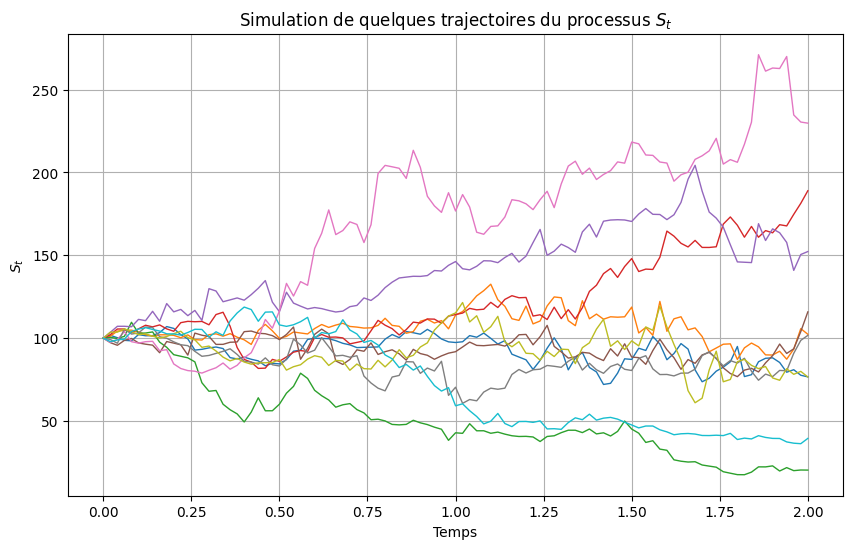

In [11]:
# Paramètres de la simulation
T = 2.0
n = 100
dt = T / n
m = 1000

# Paramètres du processus S_t
S0 = 100
sigma0 = 0.2
lambda_ = 2.0
c = 0.4
gamma = 0.3

t = np.linspace(0, T, n + 1)

S = np.zeros((m, n + 1))
sigma = np.zeros((m, n + 1))
S[:, 0] = S0
sigma[:, 0] = sigma0

for i in range(1, n + 1):
    dW1 = np.sqrt(dt) * np.random.randn(m)
    dW2 = np.sqrt(dt) * np.random.randn(m)

    sigma[:, i] = sigma[:, i - 1] + lambda_ * (c - sigma[:, i - 1]) * dt + gamma * dW2

    S[:, i] = S[:, i - 1] * np.exp(-0.5 * sigma[:, i - 1]**2 * dt + sigma[:, i - 1] * dW1)

plt.figure(figsize=(10, 6))
for j in range(10):  # Afficher les 10 premières trajectoires
    plt.plot(t, S[j], lw=1)
plt.title('Simulation de quelques trajectoires du processus $S_t$')
plt.xlabel('Temps')
plt.ylabel('$S_t$')
plt.grid(True)
plt.show()


Les trajectoires simulées du processus $ S_t $ montrent une grande variabilité dans l'évolution du prix de l'actif risqué. Toutes commencent autour de la valeur initiale $ S_0 = 100 $, mais divergent rapidement en raison de la volatilité stochastique. À mesure que le temps progresse, la dispersion augmente, avec certaines trajectoires atteignant des valeurs supérieures à 150 tandis que d'autres descendent sous 50. Cette dispersion est due à la composante de volatilité $ \sigma_t $, qui est elle-même un processus stochastique OU, amplifiant ou réduisant les fluctuations de $ S_t $ de manière aléatoire. Les trajectoires de $ S_t $ reflètent donc le comportement d'un actif risqué avec une volatilité variable, entraînant une dispersion croissante autour de la valeur initiale au fil du temps.


## Question 3
Pour simuler la variable aléatoire $\text{PL}_T(\Sigma)$, nous utilisons la formule :

$$
\text{PL}_T(\Sigma) = \frac{1}{2} \int_0^T e^{r(T - u)} (\Sigma^2 - \sigma_u^2) S_u^2 \Gamma^{\text{BS}}(u, S_u, \Sigma) \, du,
$$

où $\Gamma^{\text{BS}}$ est la gamma de l'option dans le modèle de Black-Scholes. En utilisant la formule $(9.19)$ du polycopié, $\Gamma^{\text{BS}}$ est donnée par :

$$
\Gamma^{\text{BS}}(t, S_t, \Sigma) = \frac{1}{S_t \Sigma \sqrt{T - t}} \mathcal{N}'(d^+(S_t, K, \Sigma^2 T)),
$$

où $\mathcal{N}'$ est la densité de la loi normale standard. L'expression de $d^+$ est :

$$
d^+ = \frac{\ln(S_t / K) + (r + 0.5 \Sigma^2)(T - t)}{\Sigma \sqrt{T - t}}.
$$

Ainsi, $\Gamma^{\text{BS}}$ peut être réécrite sous la forme :

$$
\Gamma^{\text{BS}}(t, S_t, \Sigma) = \frac{\exp\left(-\frac{(d^+)^2}{2}\right)}{S_t \Sigma \sqrt{2 \pi (T - t)}}.
$$

Pour obtenir une approximation numérique de $\text{PL}_T(\Sigma)$, nous remplaçons l'intégrale par une somme discrète :

$$
\text{PL}_T(\Sigma) \approx \frac{1}{2} \sum_{i=0}^{n-1} e^{r(T - t_i)} (\Sigma^2 - \sigma_{t_i}^2) S_{t_i}^2 \Gamma^{\text{BS}}(t_i, S_{t_i}, \Sigma) \Delta t,
$$.


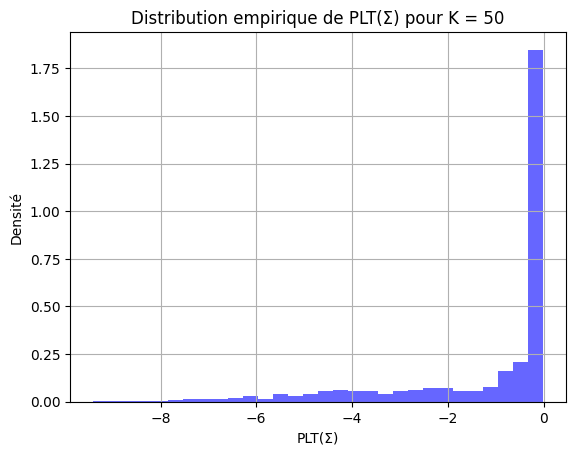

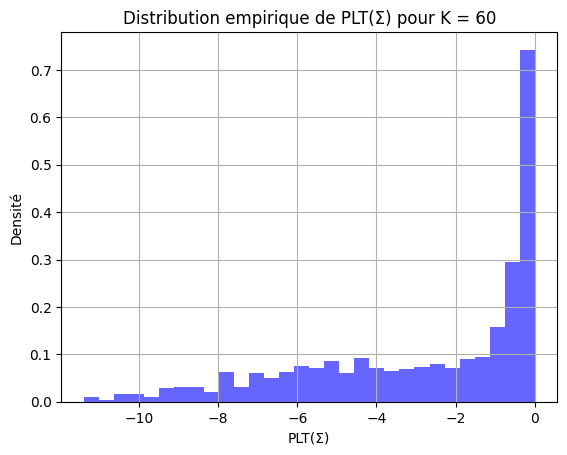

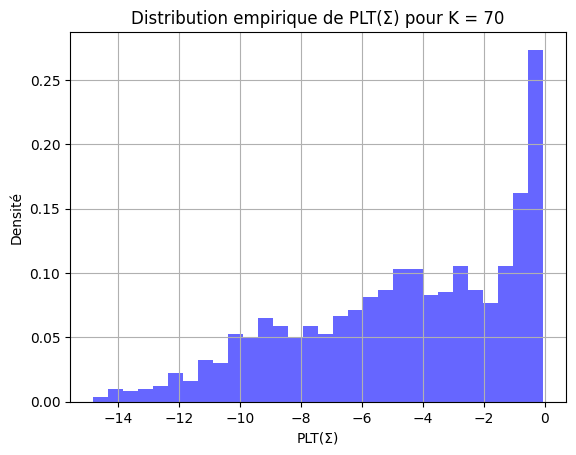

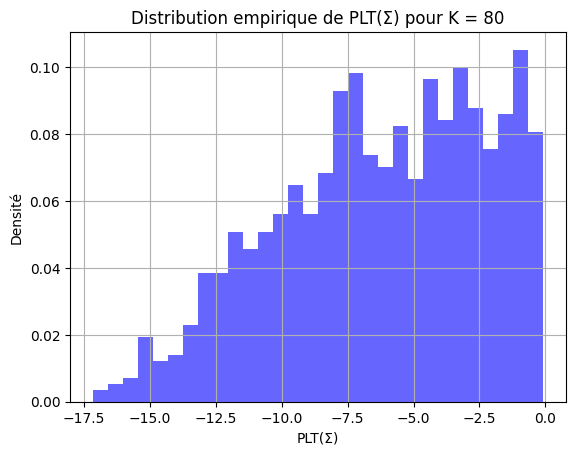

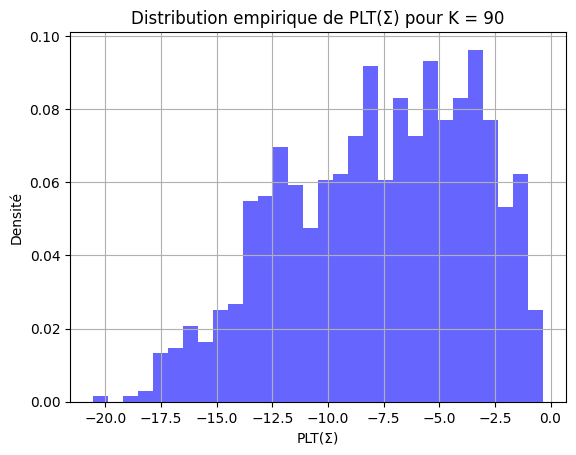

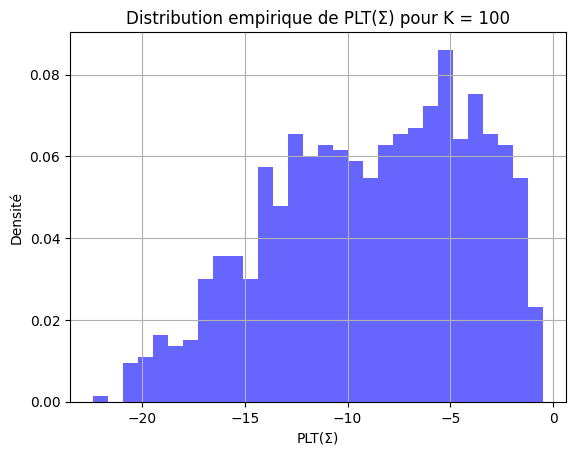

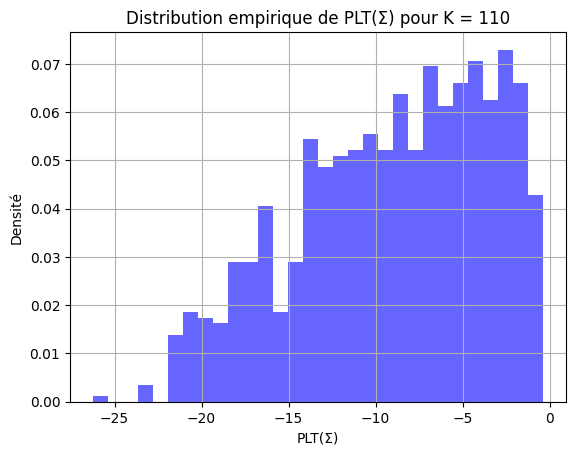

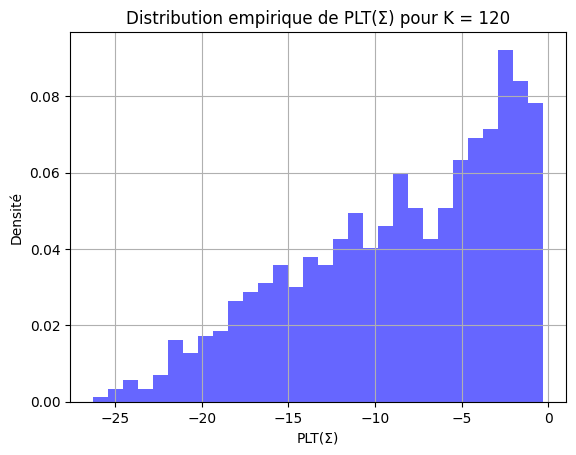

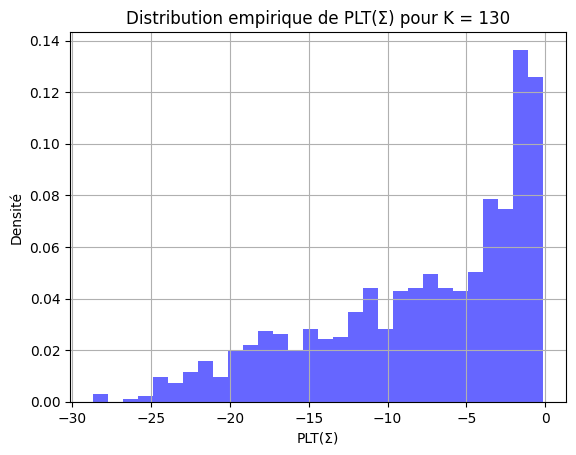

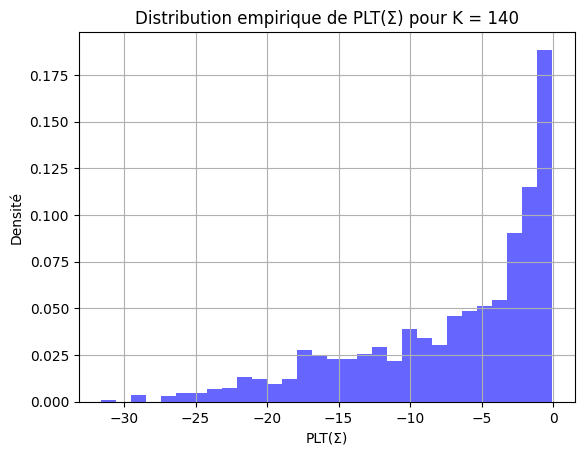

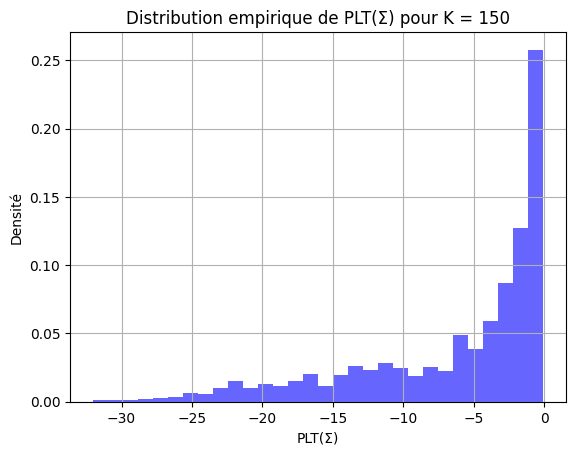

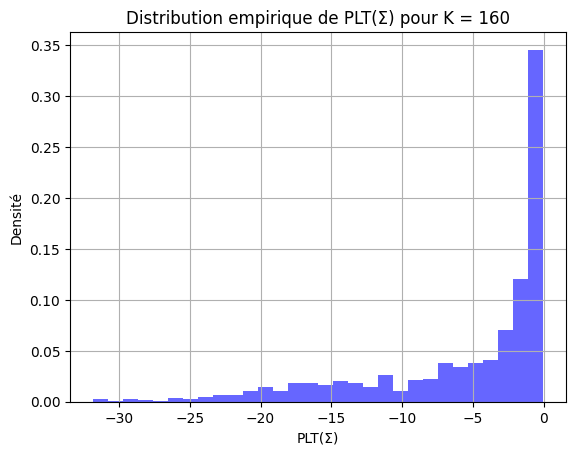

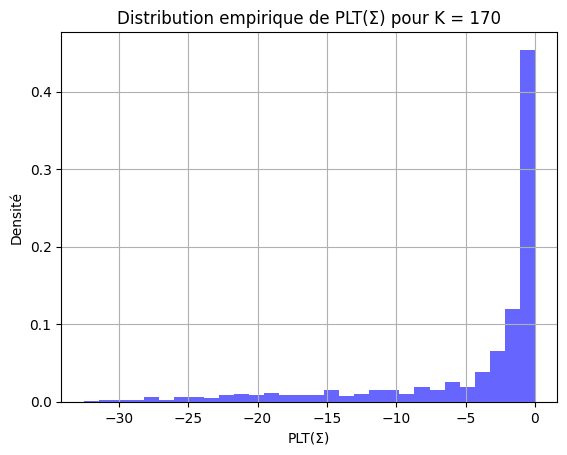

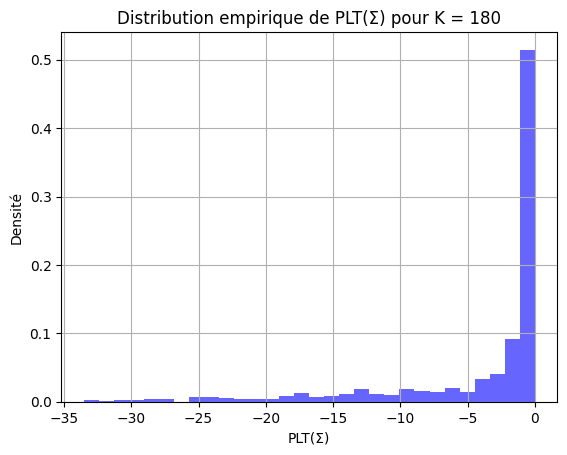

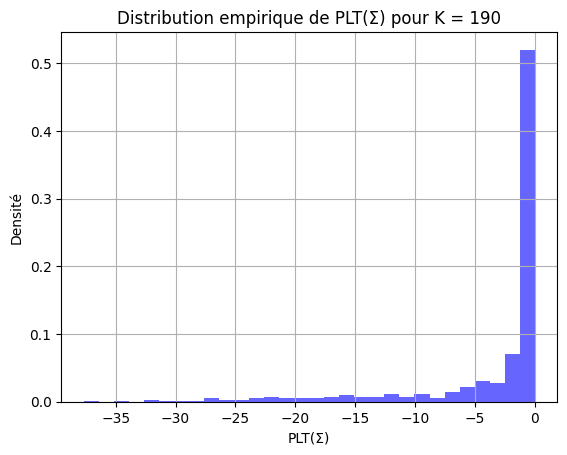

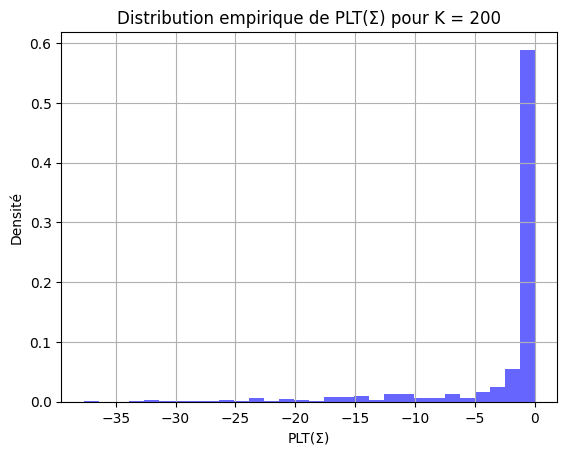

In [4]:
# Paramètres de simulation
S0 = 100
T = 2
sigma0 = 0.2
lambda_ = 2.0
c = 0.4
gamma = 0.3
r = 0.02
m = 1000
n = 100
dt = T / n

K_values = np.arange(50, 201, 2)

def d_plus(S, K, T, sigma, r, t):
    return (np.log(S / K) + (r + 0.5 * sigma**2) * (T - t)) / (sigma * np.sqrt(T - t))

def gamma_bs(S, K, T, sigma, r, t):
    d1 = d_plus(S, K, T, sigma, r, t)
    return np.exp(-d1**2 / 2) / (S * sigma * np.sqrt(2 * np.pi * (T - t)))

mean_PLT = []
var_PLT = []

for K in K_values:
    PLT = []
    for _ in range(m):
        S = S0
        sigma = sigma0
        integral = 0.0

        for i in range(n):
            dW1 = np.sqrt(dt) * np.random.randn()
            dW2 = np.sqrt(dt) * np.random.randn()
            sigma = sigma + lambda_ * (c - sigma) * dt + gamma * dW2
            S = S * np.exp(-0.5 * sigma**2 * dt + sigma * dW1)

            gamma = gamma_bs(S, K, T, sigma0, r, i * dt)
            integral += np.exp(r * (T - i * dt)) * (sigma0**2 - sigma**2) * S**2 * gamma * dt

        PLT.append(0.5 * integral)

    mean_PLT.append(np.mean(PLT))
    var_PLT.append(np.var(PLT))

    if K%10==0:
        plt.figure()
        plt.hist(PLT, bins=30, density=True, alpha=0.6, color='b')
        plt.title(f'Distribution empirique de PLT(Σ) pour K = {K}')
        plt.xlabel('PLT(Σ)')
        plt.ylabel('Densité')
        plt.grid(True)
        plt.show()

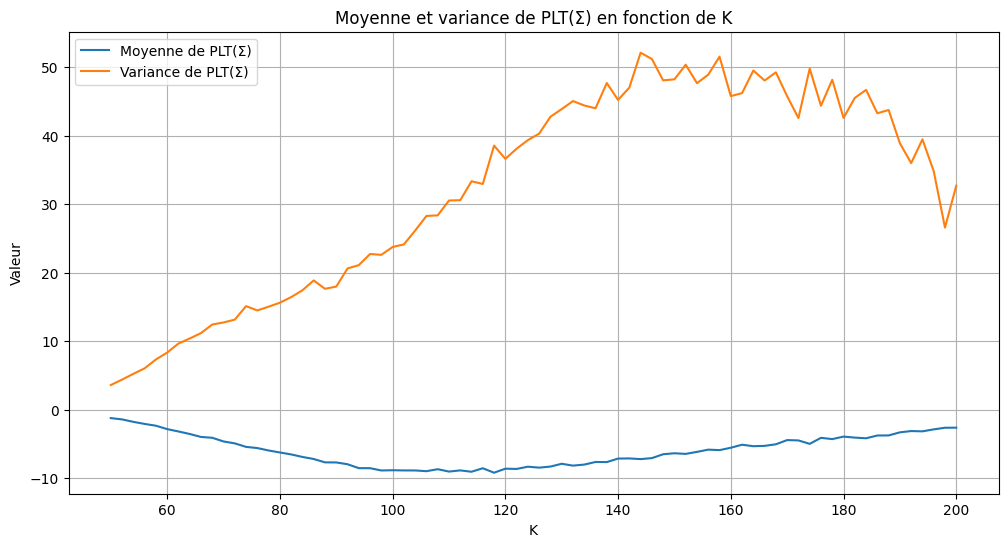

In [5]:
plt.figure(figsize=(12, 6))
plt.plot(K_values, mean_PLT, label='Moyenne de PLT(Σ)')
plt.plot(K_values, var_PLT, label='Variance de PLT(Σ)')
plt.xlabel('K')
plt.ylabel('Valeur')
plt.legend()
plt.title('Moyenne et variance de PLT(Σ) en fonction de K')
plt.grid(True)
plt.show()

Les courbes de la **moyenne et variance de $\text{PL}_T(\Sigma)$ en fonction de $K$** révèlent des tendances intéressantes. La moyenne de $\text{PL}_T(\Sigma)$ diminue lentement jusqu'à une certaine valeur de $K$, puis commence à augmenter progressivement pour des valeurs plus élevées. Cette évolution peut s'interpréter comme une indication que la stratégie de couverture tend à générer des pertes plus importantes pour des options légèrement dans la monnaie (autour de la valeur minimale de la moyenne). Cependant, pour des valeurs de $K$ très élevées, la moyenne remonte, ce qui pourrait refléter une moindre efficacité de la couverture pour des options très dans la monnaie, où l'impact de la volatilité stochastique devient moins prévisible.

La variance de $\text{PL}_T(\Sigma)$, quant à elle, augmente fortement jusqu'à une certaine valeur de $K$, au-delà de laquelle elle commence à décroître lentement. Cette augmentation initiale de la variance traduit un risque croissant associé aux pertes de couverture pour des options de plus en plus dans la monnaie, mais à partir d'un certain seuil de $K$, ce risque semble se stabiliser et même légèrement décroître. Cela peut s'expliquer par le fait que, pour des valeurs très élevées de $K$, les trajectoires de prix de l'actif tendent à se stabiliser par rapport au prix d'exercice, réduisant ainsi la variabilité des résultats de couverture.

Les **histogrammes des distributions empiriques de $\text{PL}_T(\Sigma)$** montrent également une évolution distincte en fonction de $K$. Pour de faibles valeurs de $K$, la distribution est asymétrique avec une concentration de valeurs proches de zéro et une queue s'étendant modérément vers des pertes. À mesure que $K$ augmente, la distribution s'étale progressivement, ce qui reflète une augmentation de la dispersion des résultats. Pour des valeurs de $K$ très élevées, la distribution devient de nouveau très asymétrique, avec une queue beaucoup plus longue vers les pertes importantes, traduisant un risque accru pour ces strikes élevés.

En somme, cette évolution des histogrammes souligne que la couverture Black-Scholes, avec volatilité constante, est particulièrement inefficace dans un cadre de volatilité stochastique, surtout pour les options profondément dans la monnaie, où les pertes importantes deviennent plus probables.
